In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def split_df(df, fd_list):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CT_Time', 'CCL_Time'])
    for filename in df['File Path']:
        new_name = filename.replace("../../../Data/jpg/jpg_fd_files/","")
        name_list = new_name.split('/')
        if name_list[1] not in fd_list:
            continue
        prop_list = name_list[-1].split('=')
        node_number = prop_list[1].replace('d','')
        if "_" in prop_list[2]:
            degree = prop_list[2].split("_")[0]
        else:
            degree = prop_list[2].replace(".jpg","")
        ct = df.loc[df['File Path'] == filename, 'CT Time'].values[0]
        ccl = df.loc[df['File Path'] == filename, 'CCL Time'].values[0]
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, ct, ccl]
        
    return df_result



In [10]:
def average_same_degree(df_splitted, degree, num_list):
    result_dict = {}
    degree_list = []
    average_ct_list = []
    average_ccl_list = []
    nodes_list = []
    for num in num_list:
        average_ct = df_splitted.loc[(df_splitted['Nodes_Number'] == str(num)) & (df_splitted['Degree'] == str(degree)) , 'CT_Time'].mean()
        average_ccl = df_splitted.loc[(df_splitted['Nodes_Number'] == str(num)) & (df_splitted['Degree'] == str(degree)), 'CCL_Time'].mean()
        # column_ct = df_splitted.loc[(df_splitted['Nodes_Number'] == str(num)) & (df_splitted['Degree'] == str(degree)), 'CT_Time']
        # column_ccl = df_splitted.loc[(df_splitted['Nodes_Number'] == str(num)) & (df_splitted['Degree'] == str(degree)), 'CCL_Time']
        # print(column_ct)
        # print(column_ccl)
        degree_list.append(str(degree))
        nodes_list.append(str(num))
        average_ct_list.append(average_ct)
        average_ccl_list.append(average_ccl)
        
        # print(average_ccl)
        # print(average_ct)
    result_dict['Degree'] = degree_list
    result_dict['Nodes_Number'] = nodes_list
    result_dict['Average_CT'] = average_ct_list
    result_dict['Average_CCL'] = average_ccl_list
    return result_dict

In [11]:
def draw_speed_line_chart_in_same_degree(_degree, nodes_number_list, ct_list, ccl_list):
    y1 = ct_list
    y2 = ccl_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='CT_Time')
    plt.plot(nodes_number_list, y2, label='CCL_Time')
    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Degree=' + str(_degree))
    plt.legend()
    fname = "Average_LineChart_d="+str(_degree)+".pdf"

    plt.savefig(os.path.join("LineCharts",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

In [12]:
def draw_speed_bar_in_same_degree(_degree, nodes_number_value, ct_list, ccl_list, total_width=0.8, n=2, num=5):
    target_path = "Bars"
    x=np.arange(num)#柱状图在横坐标上的位置
    width = total_width / n
    x = x - (total_width - width) / 2
    # fname = "Type="+_type+"_d="+str(_degree)+"_FD="+fd+".pdf"
    fname = "Average_Bar_d="+str(_degree)+".pdf"
    plt.bar(x + width/2, ct_list,  width=width, label='FD-CT Time')
    plt.bar(x+width/2+width, ccl_list, width=width, label='FD-CCL Time')
    # plt.bar(x+width*2, ct, width=width, label='CT')
    # 功能2
    for i, j in zip(x + width/2, ct_list):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)
    for i, j in zip(x+width/2+width, ccl_list):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)

    plt.legend()
    plt.xticks(x+total_width/2,nodes_number_value)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
    # plt.title("Type="+_type+", degree="+str(_degree)+", FD algorithm="+fd)
    plt.title("Degree="+str(_degree))

    plt.ylabel('Processing Time(s)')
    plt.xlabel('Number of Nodes')
    # plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight", pad_inches = 1,transparent = True) 
    plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight") 
    plt.show()

In [13]:
def main_process(degree_list, num_list, num, fd_list):
    fname = os.path.join("csv","velocity_result.csv")
    # Load CSV file as pandas DataFrame
    df = pd.read_csv(fname)
    df_splitted = split_df(df,fd_list)
    for degree in degree_list:
        result_dict = average_same_degree(df_splitted, degree, num_list)
        result_df = pd.DataFrame.from_dict(result_dict)
        result_df.to_csv("csv/average_d="+ str(degree) + ".csv",index=True)
        # csv_name = "csv/average_d="+str(degree)+".csv"
        # df_csv = pd.read_csv(csv_name)
        ct_list = result_df['Average_CT'].values
        ccl_list = result_df['Average_CCL'].values
        draw_speed_bar_in_same_degree(degree, num_list, ct_list, ccl_list, num = num)
        draw_speed_line_chart_in_same_degree(degree, num_list, ct_list, ccl_list)

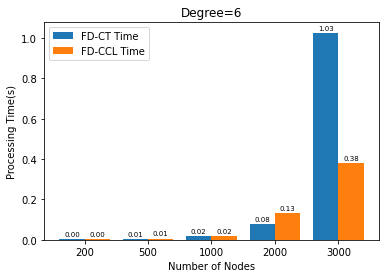

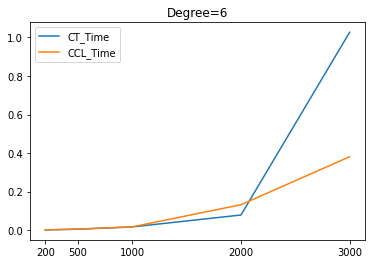

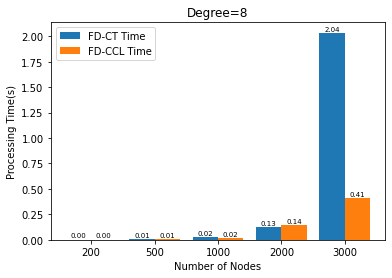

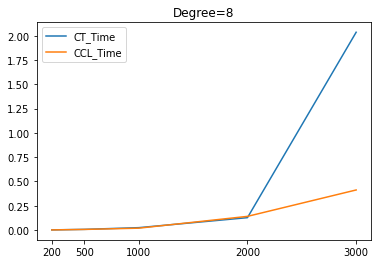

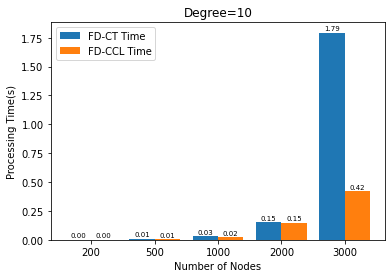

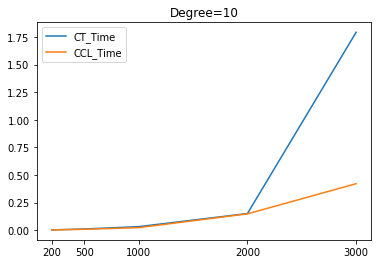

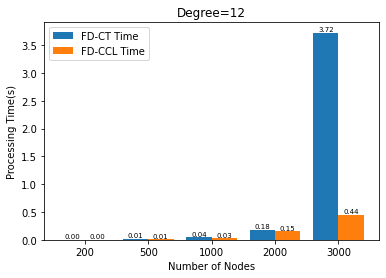

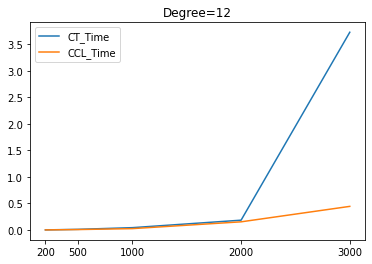

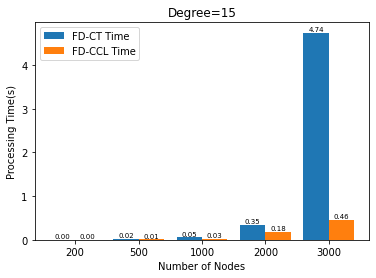

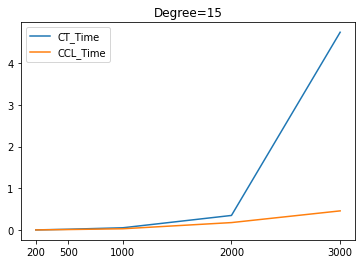

In [14]:
degree_list = [6, 8, 10, 12, 15]
num_list = [200, 500, 1000, 2000, 3000]
fd_list = ["FA2", "FR", "JIGGLE"]
main_process(degree_list=degree_list, num_list=num_list, num=len(num_list), fd_list = fd_list)